In [1]:
from evaldet import Tracks, MOTMetrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


pd.set_option('precision', 2)

print(plt.rcParams["figure.figsize"])

[6.4, 4.8]


In [2]:

gt_tracks = Tracks.from_mot('./DATA/output_4_gt.txt')
tracks = Tracks.from_mot('./OUTPUT/ocsort_tracking_output_4_kalman.txt')
tracks = Tracks.from_mot('./OUTPUT/deepsort_tracking_output_4.txt')

eval_obj = MOTMetrics(clearmot_dist_threshold=0.5, id_dist_threshold=0.5)

In [3]:
metrics = eval_obj.compute(gt_tracks, tracks, clearmot_metrics=True, id_metrics=True, hota_metrics=True)
metrics['clearmot']['MOTP'] = 1 - metrics['clearmot']['MOTP']

In [4]:
print('CLEARMOT')
print(pd.DataFrame(metrics['clearmot'], index=['values']))
print('-' * 10)
print('IDs')
print(pd.DataFrame(metrics['id'], index=['values']))
print('-' * 10)
print('HOTA')
print(pd.DataFrame({k : v for k, v in metrics['hota'].items() if k in ['HOTA', 'DetA', 'AssA', 'LocA']}, index=['values']))

CLEARMOT
        MOTP  MOTA  FP_CLEAR  FN_CLEAR  IDSW
values  0.69   0.1      3487     23881     0
----------
IDs
        IDTP  IDFP   IDFN   IDP   IDR  IDF1
values  2605  7394  27788  0.26  0.09  0.13
----------
HOTA
        HOTA  DetA  AssA  LocA
values  0.18  0.18  0.17  0.73


In [5]:
print('-' * 10)
print('HOTA alpha')

new = '_\\'
hota_alpha = pd.DataFrame({fr"${k.replace('_', new)}$" : v for k, v in metrics['hota'].items() if k not in ['HOTA', 'DetA', 'AssA', 'LocA', 'alphas_HOTA']}, index=metrics['hota']['alphas_HOTA'])
print(hota_alpha)

----------
HOTA alpha
      $HOTA_\alpha$  $DetA_\alpha$  $AssA_\alpha$  $LocA_\alpha$
0.05       6.28e-03       3.05e-03           0.01           0.97
0.10       1.62e-02       1.12e-02           0.02           0.94
0.15       2.73e-02       2.19e-02           0.03           0.91
0.20       4.11e-02       3.70e-02           0.05           0.87
0.25       5.83e-02       5.54e-02           0.06           0.84
0.30       7.81e-02       7.76e-02           0.08           0.81
0.35       1.01e-01       1.03e-01           0.10           0.78
0.40       1.28e-01       1.32e-01           0.12           0.75
0.45       1.57e-01       1.62e-01           0.15           0.72
0.50       1.85e-01       1.92e-01           0.18           0.69
0.55       2.16e-01       2.23e-01           0.21           0.67
0.60       2.46e-01       2.52e-01           0.24           0.65
0.65       2.72e-01       2.78e-01           0.27           0.63
0.70       2.92e-01       2.97e-01           0.29           0.61
0.7

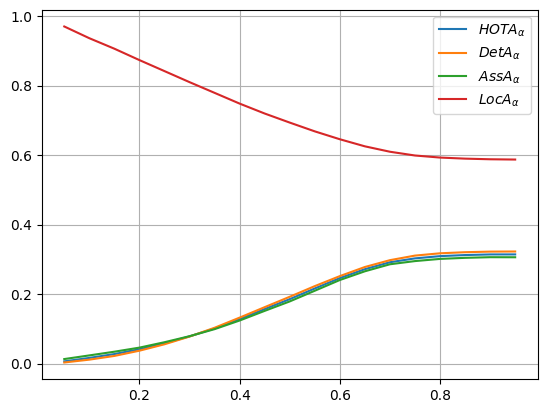

In [6]:
fig = hota_alpha.plot.line()
fig.grid(True)